In [1]:
from qiskit_ibm_provider import IBMProvider
#from qiskit_qutrit_calibration import QutritCalibrations, SingleQutrit, library
from qutrit_calibration import QutritCalibrations, SingleQutrit, library
import pandas as pd

ModuleNotFoundError: No module named 'qiskit_ibm_provider'

In [2]:
provider = IBMProvider()
backend = provider.get_backend("ibm_algiers")

## Initialize

In [3]:
qind = 1

qutrit = SingleQutrit(default_values={"duration": 160, "σ": 40})
cals = QutritCalibrations.from_backend(backend, libraries=[qutrit])

In [4]:
pd.DataFrame(
    **cals.parameters_table(parameters=["duration", "amp", "σ", "β", "α"])
).sort_values(by=["qubits", "parameter"])

,parameter,qubits,schedule,value,group,valid,date_time,exp_id
10,amp,(),x12,1.400000e-01,default,True,2023-06-10 02:44:43.996075+0900,None
16,amp,(),sx12,7.000000e-02,default,True,2023-06-10 02:44:43.996109+0900,None
5,duration,(),x12,1.600000e+02,default,True,2023-06-10 02:44:43.996041+0900,None
32,α,(),None,-3.000000e+08,default,True,2023-06-10 02:44:43.996133+0900,None
14,β,(),x12,0.000000e+00,default,True,2023-06-10 02:44:43.996093+0900,None
22,β,(),sx12,0.000000e+00,default,True,2023-06-10 02:44:43.996117+0900,None
20,σ,(),x12,4.000000e+01,default,True,2023-06-10 02:44:43.996085+0900,None
9,α,"(0,)",None,-3.441380e+08,default,True,2023-06-10 01:30:25.000000+0900,None
31,α,"(1,)",None,-3.487003e+08,default,True,2023-06-10 01:30:25.000000+0900,None
19,α,"(2,)",None,-3.415505e+08,default,True,2023-06-10 01:30:25.000000+0900,None


## Rough frequency

572c629e-6137-4d51-a25f-b554583c005f


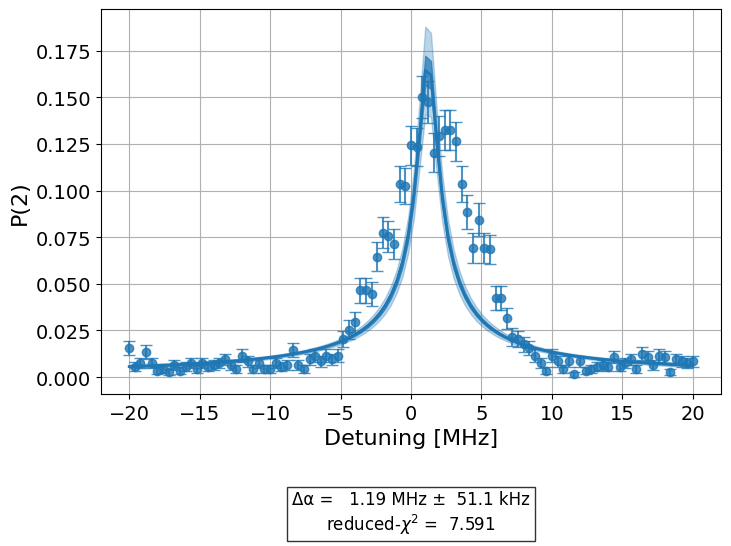

In [5]:
exp = library.RoughEFFrequencyCal((qind, ), calibrations=cals, backend=backend)
expdata = exp.run(shots=1000)

print(expdata.experiment_id)
expdata.block_for_results()
expdata.figure(0)

In [6]:
pd.DataFrame(
    **cals.parameters_table(parameters=["α"], qubit_list=[qind], most_recent_only=False)
).sort_values(by="date_time")

,parameter,qubits,schedule,value,group,valid,date_time,exp_id
0,α,"(1,)",None,-3.487003e+08,default,True,2023-06-10 01:30:25.000000+0900,None
1,α,"(1,)",None,-3.475077e+08,default,True,2023-06-10 04:02:22.239967+0900,572c629e-6137-4d51-a25f-b554583c005f
2,α,"(1,)",None,-3.463151e+08,default,True,2023-06-10 04:02:22.241207+0900,572c629e-6137-4d51-a25f-b554583c005f


## Rough amp

e98dc2e8-795e-4af3-b26e-62ea74f0cfe2


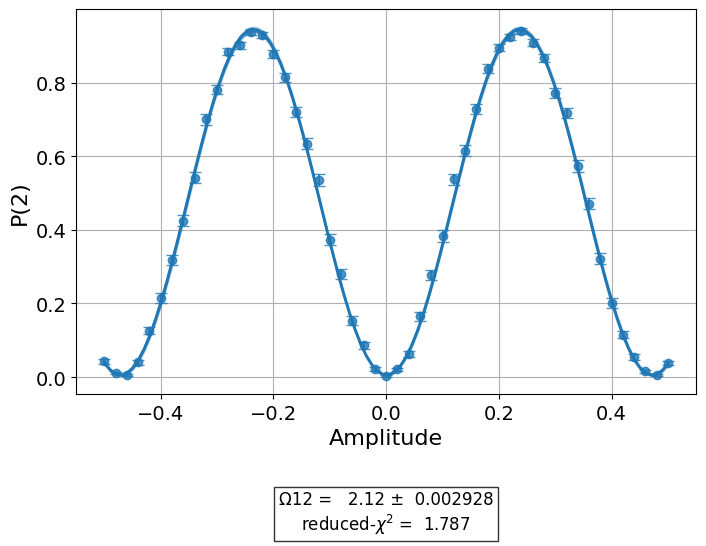

In [7]:
exp = library.RoughEFAmplitudeCal((qind, ), calibrations=cals, backend=backend)
expdata = exp.run(shots=1000)

print(expdata.experiment_id)
expdata.block_for_results()
expdata.figure(0)

In [8]:
pd.DataFrame(
    **cals.parameters_table(parameters=["amp"], qubit_list=[qind], most_recent_only=False)
).sort_values(by="date_time")

,parameter,qubits,schedule,value,group,valid,date_time,exp_id
0,amp,"(1,)",x12,0.235890,default,True,2023-06-10 04:37:27.148402+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2
2,amp,"(1,)",sx12,0.117945,default,True,2023-06-10 04:37:27.156217+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2
1,amp,"(1,)",x12,0.235890,default,True,2023-06-10 04:37:27.162975+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2
3,amp,"(1,)",sx12,0.117945,default,True,2023-06-10 04:37:27.168464+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2


## Narrow band spectroscopy

5b8168a9-c769-4246-a33d-0d60625fbcc6


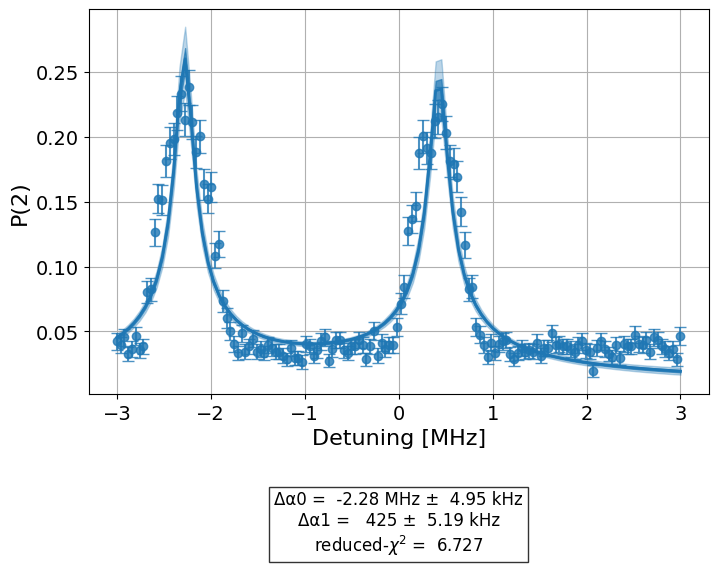

In [9]:
exp = library.NarrowBandEFSpectroscopyCal((qind, ), calibrations=cals, backend=backend)
expdata = exp.run(shots=1000)

print(expdata.experiment_id)
expdata.block_for_results()
expdata.figure(0)

In [10]:
pd.DataFrame(
    **cals.parameters_table(parameters=["α"], qubit_list=[qind], most_recent_only=False)
).sort_values(by="date_time")

,parameter,qubits,schedule,value,group,valid,date_time,exp_id
0,α,"(1,)",None,-3.487003e+08,default,True,2023-06-10 01:30:25.000000+0900,None
1,α,"(1,)",None,-3.475077e+08,default,True,2023-06-10 04:02:22.239967+0900,572c629e-6137-4d51-a25f-b554583c005f
2,α,"(1,)",None,-3.463151e+08,default,True,2023-06-10 04:02:22.241207+0900,572c629e-6137-4d51-a25f-b554583c005f
3,α,"(1,)",None,-3.472435e+08,default,True,2023-06-10 04:44:27.969756+0900,5b8168a9-c769-4246-a33d-0d60625fbcc6
4,α,"(1,)",None,-3.481720e+08,default,True,2023-06-10 04:44:27.970392+0900,5b8168a9-c769-4246-a33d-0d60625fbcc6


## Rough DRAG

9f38c04b-80d9-49ba-adc2-6644e447287a


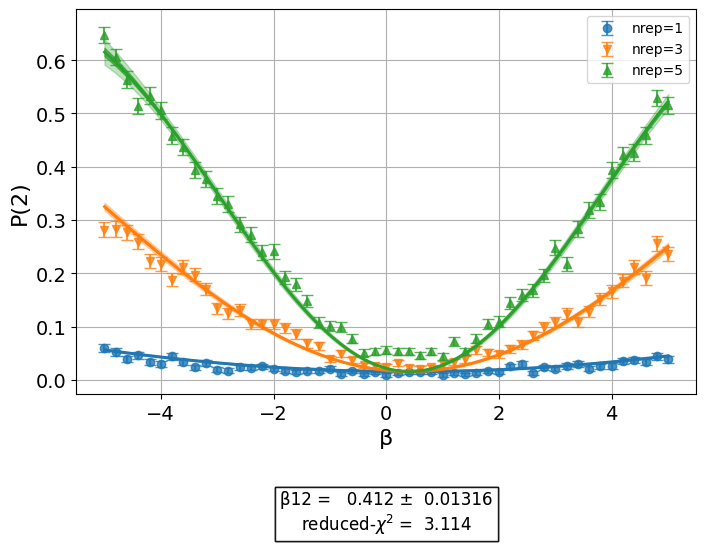

In [11]:
exp = library.RoughEFXDragCal((qind, ), calibrations=cals, backend=backend)
expdata = exp.run(shots=1000)

print(expdata.experiment_id)
expdata.block_for_results()
expdata.figure(0)

In [12]:
pd.DataFrame(
    **cals.parameters_table(parameters=["β"], qubit_list=[qind], most_recent_only=False)
).sort_values(by="date_time")

,parameter,qubits,schedule,value,group,valid,date_time,exp_id
0,β,"(1,)",x12,0.412007,default,True,2023-06-10 04:51:23.982690+0900,9f38c04b-80d9-49ba-adc2-6644e447287a
1,β,"(1,)",x12,0.412007,default,True,2023-06-10 04:51:23.990180+0900,9f38c04b-80d9-49ba-adc2-6644e447287a


## Fine X amp

405ceab5-b05b-4573-928b-489b068a13f7


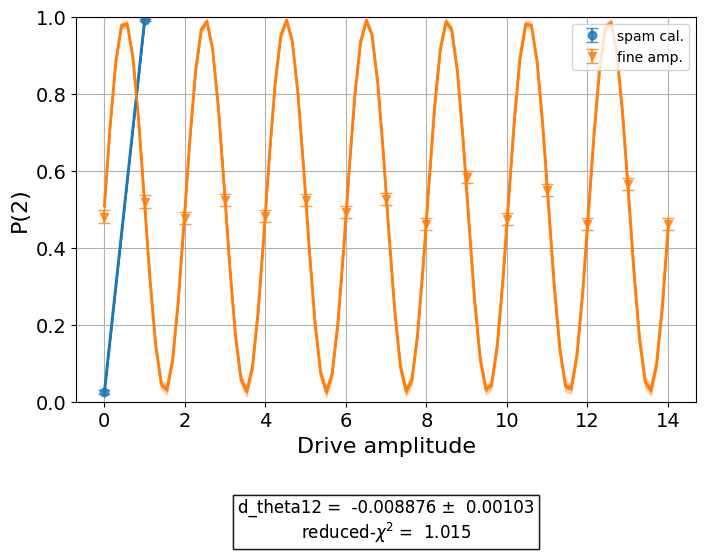

In [13]:
exp = library.FineEFXAmplitudeCal((qind, ), calibrations=cals, backend=backend)
expdata = exp.run(shots=1000)

print(expdata.experiment_id)
expdata.block_for_results()
expdata.figure(0)

8cbdc3a2-9629-4136-9c2d-90e3b572fd01


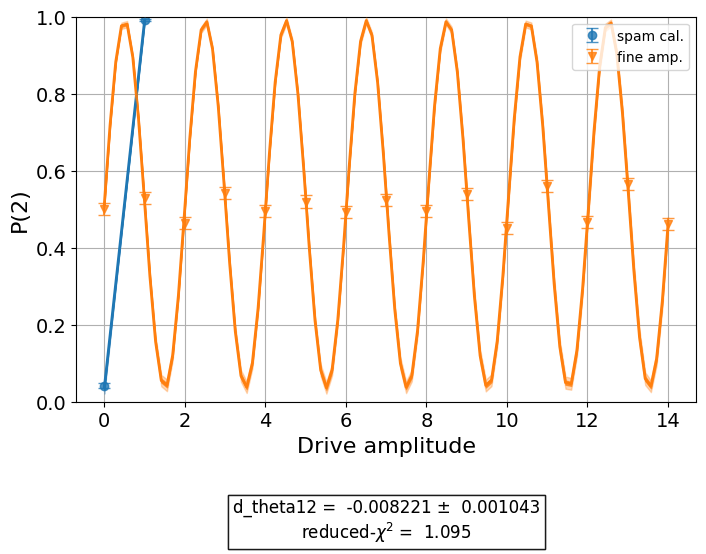

In [14]:
exp = library.FineEFXAmplitudeCal((qind, ), calibrations=cals, backend=backend)
expdata = exp.run(shots=1000)

print(expdata.experiment_id)
expdata.block_for_results()
expdata.figure(0)

In [15]:
pd.DataFrame(
    **cals.parameters_table(parameters=["amp"], qubit_list=[qind], most_recent_only=False)
).sort_values(by="date_time")

,parameter,qubits,schedule,value,group,valid,date_time,exp_id
0,amp,"(1,)",x12,0.235890,default,True,2023-06-10 04:37:27.148402+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2
6,amp,"(1,)",sx12,0.117945,default,True,2023-06-10 04:37:27.156217+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2
1,amp,"(1,)",x12,0.235890,default,True,2023-06-10 04:37:27.162975+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2
7,amp,"(1,)",sx12,0.117945,default,True,2023-06-10 04:37:27.168464+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2
2,amp,"(1,)",x12,0.236559,default,True,2023-06-10 05:03:26.853912+0900,405ceab5-b05b-4573-928b-489b068a13f7
3,amp,"(1,)",x12,0.237229,default,True,2023-06-10 05:03:26.863437+0900,405ceab5-b05b-4573-928b-489b068a13f7
4,amp,"(1,)",x12,0.237851,default,True,2023-06-10 05:25:25.034280+0900,8cbdc3a2-9629-4136-9c2d-90e3b572fd01
5,amp,"(1,)",x12,0.238475,default,True,2023-06-10 05:25:25.043375+0900,8cbdc3a2-9629-4136-9c2d-90e3b572fd01


Calibrated parameters

In [16]:
pd.DataFrame(
    **cals.parameters_table(parameters=["duration", "amp", "σ", "β", "α"], qubit_list=[qind])
).sort_values(by="schedule")

,parameter,qubits,schedule,value,group,valid,date_time,exp_id
2,amp,"(1,)",sx12,1.179452e-01,default,True,2023-06-10 04:37:27.168464+0900,e98dc2e8-795e-4af3-b26e-62ea74f0cfe2
0,amp,"(1,)",x12,2.384755e-01,default,True,2023-06-10 05:25:25.043375+0900,8cbdc3a2-9629-4136-9c2d-90e3b572fd01
1,β,"(1,)",x12,4.120074e-01,default,True,2023-06-10 04:51:23.990180+0900,9f38c04b-80d9-49ba-adc2-6644e447287a
3,α,"(1,)",None,-3.481720e+08,default,True,2023-06-10 04:44:27.970392+0900,5b8168a9-c769-4246-a33d-0d60625fbcc6


## EF Randomized benchmarking

d2a83942-b689-43b5-8435-93f6d87ee81c


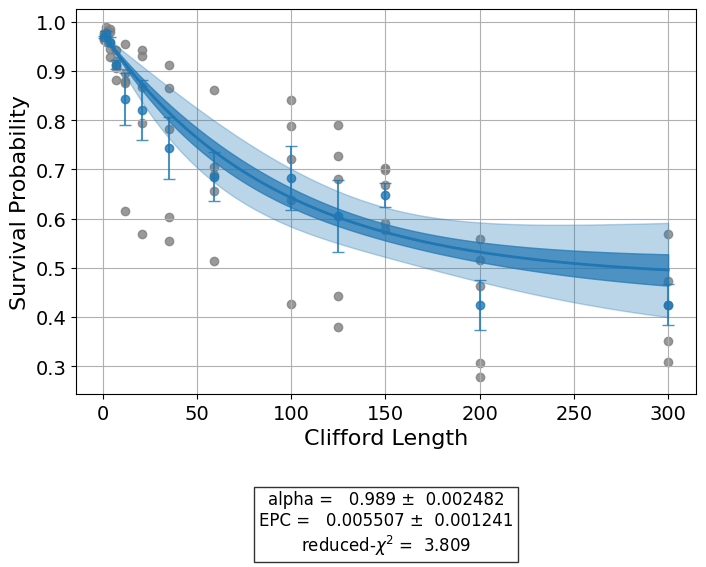

In [24]:
ncliffords = [1, 2, 4, 7, 12, 21, 35, 59, 100, 125, 150, 200, 300]

exp = library.EFPolarRB1Q(physical_qubits=(qind, ), calibrations=cals, backend=backend)
exp.set_experiment_options(lengths=ncliffords)

expdata = exp.run(shots=3000)

print(expdata.experiment_id)
expdata.block_for_results()
expdata.figure(0)

Physical X12 gate error

In [25]:
expdata.analysis_results("EPC").value / 2

0.0027534640283214673+/-0.0006204212205439165